In [59]:
import torch
from torchvision import datasets, transforms
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [60]:

# Define the transformation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Flatten the images and create the data matrix
def flatten_images(dataset):
    data_matrix = torch.stack([image.view(-1) for image, _ in dataset])
    return data_matrix

train_data_matrix = flatten_images(train_dataset)
test_data_matrix = flatten_images(test_dataset)

labels_true = [label for _, label in train_dataset]


In [73]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # You can adjust the number of components
train_data_matrix_pca = pca.fit_transform(train_data_matrix)



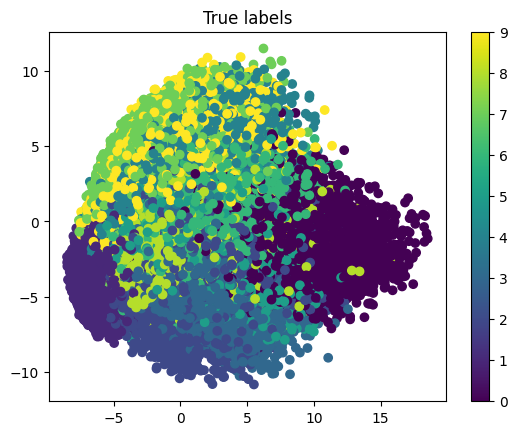

In [74]:

# Visualize the clusters
plt.scatter(train_data_matrix_pca[:, 0], train_data_matrix_pca[:, 1], c=labels_true)
#colorbar
plt.colorbar()
plt.title('True labels')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of labels in each cluster: 
39 2103
1 1903
5 1895
22 1563
3 1426
43 1421
45 1418
46 1407
41 1389
9 1383
17 1374
18 1356
23 1338
49 1334
14 1313
0 1303
36 1287
16 1251
38 1230
27 1228
2 1226
47 1216
44 1215
42 1174
24 1170
34 1163
29 1149
48 1133
19 1121
40 1086
4 1081
25 1058
32 1051
6 1048
12 1045
15 1045
21 1031
28 1016
10 1014
11 1013
7 1013
20 990
35 972
31 953
30 932
13 921
26 897
8 881
37 771
33 693


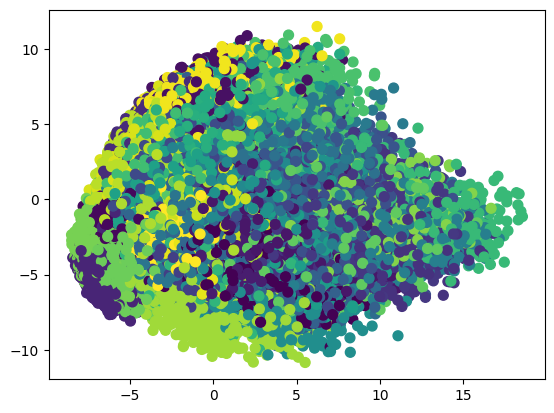

In [86]:

# KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=50, random_state=0).fit(train_data_matrix_pca)

# print the number of labels in each cluster, sorted by cluster counts
print("Number of labels in each cluster: ")
# import counter
from collections import Counter
for key, value in list(sorted(Counter(kmeans.labels_).items(), key=lambda x: x[1], reverse=True)):
    if key != -1:
        print(key, end=' ')
        print(value)

#plot kmeans
plt.scatter(train_data_matrix_pca[:, 0], train_data_matrix_pca[:, 1], c=kmeans.labels_, s=50, cmap='viridis')

Text(113.9222222222222, 0.5, 'predicted label')

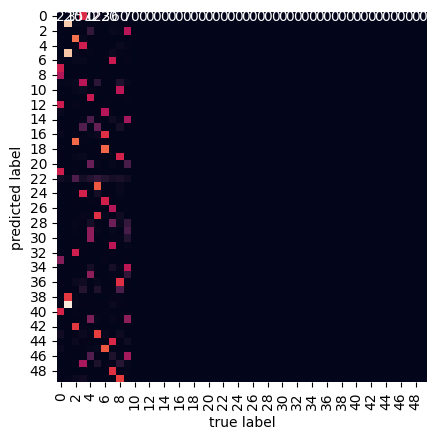

In [87]:
# plot confusion matrix between kmeans and true labels
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(labels_true, kmeans.labels_)
# map cluster labels to true labels, by finding the most common label in each cluster
# use the confusion matrix to do this
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

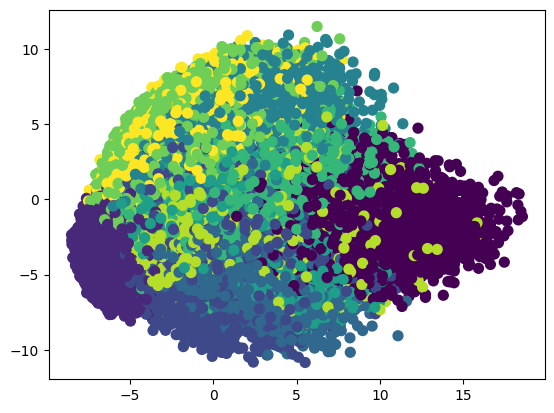

In [88]:
mat = mat[:10]  # 10, 30
perm = mat.argmax(axis=0)
#
k_align = [perm[label] for label in kmeans.labels_]
# plot
plt.scatter(train_data_matrix_pca[:, 0], train_data_matrix_pca[:, 1], c=k_align, s=50, cmap='viridis')


Text(77.92222222222227, 0.5, 'predicted label')

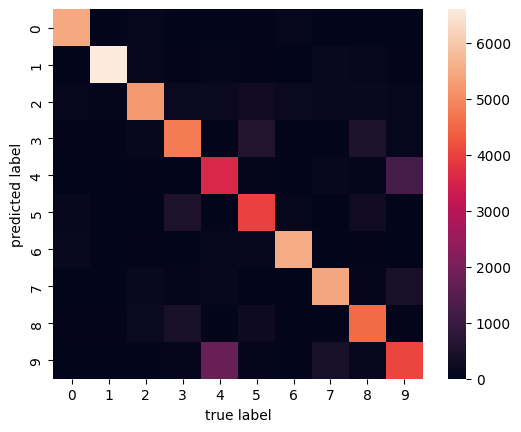

In [89]:
# confusion matrix between k_align and true labels
mat = confusion_matrix(labels_true, k_align)

# plot mat
sns.heatmap(mat.T, square=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [104]:
# print the top confusion cells off of the diagonal
inds = mat.argsort(axis=None)
inds = inds[:-20:-1]
for ind in inds:
    if ind // 10 != ind % 10:
        print(ind // 10, ind % 10, mat.ravel()[ind])

4 9 1769
9 4 1186
5 3 593
3 5 503
8 3 501
3 8 431
9 7 425
7 9 415
8 5 277
